In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/26_problem1.csv')
data

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Single,58138.0,0,0,635,88,546,172,88,3,8,10,4,7
1,2174,1954,Single,46344.0,1,1,11,1,6,2,1,2,1,1,2,5
2,4141,1965,Together,71613.0,0,0,426,49,127,111,21,1,8,2,10,4
3,6182,1984,Together,26646.0,1,0,11,4,20,10,3,2,2,0,4,6
4,5324,1981,Married,58293.0,1,0,173,43,118,46,27,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Married,61223.0,0,1,709,43,182,42,118,2,9,3,4,5
2236,4001,1946,Together,64014.0,2,1,406,0,30,0,0,7,8,2,5,7
2237,7270,1981,Divorced,56981.0,0,0,908,48,217,32,12,1,2,3,13,6
2238,8235,1956,Together,69245.0,0,1,428,30,214,80,30,2,6,5,10,3


In [2]:
data.isna().sum()

ID                      0
Year_Birth              0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
dtype: int64

In [3]:
data.Income = data.Income.fillna(data.Income.mean())

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null   i

In [5]:
box_col = data.columns.drop(['ID','Marital_Status'])
import matplotlib.pyplot as plt
import seaborn as sns
x = data[box_col]
df_v1 = pd.melt(x,var_name = 'col', value_name = 'value')
df_v1

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,col,value
0,Year_Birth,1957.0
1,Year_Birth,1954.0
2,Year_Birth,1965.0
3,Year_Birth,1984.0
4,Year_Birth,1981.0
...,...,...
31355,NumWebVisitsMonth,5.0
31356,NumWebVisitsMonth,7.0
31357,NumWebVisitsMonth,6.0
31358,NumWebVisitsMonth,3.0


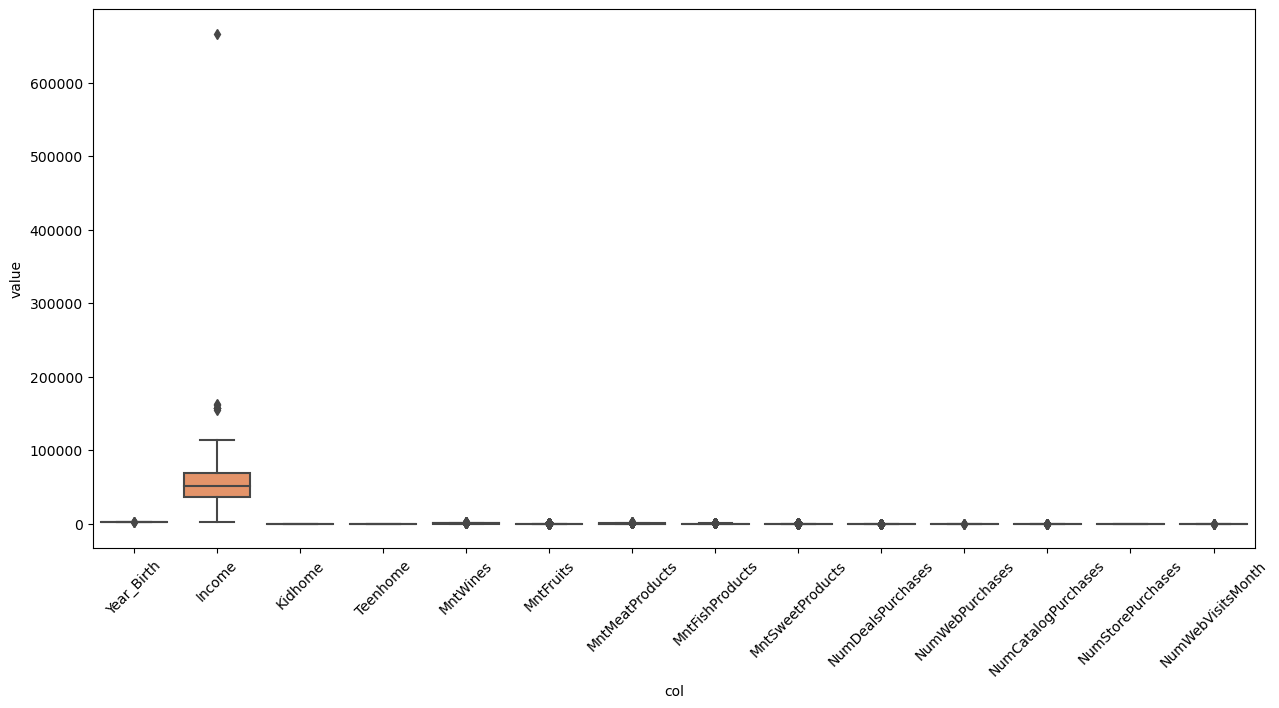

In [6]:
plt.figure(figsize = (15,7))
sns.boxplot(x = 'col',y = 'value', data = df_v1)
plt.xticks(range(len(x.columns)), x.columns, rotation = 45)
plt.show()

In [7]:
def detect_outliers(df = None, column = None, weight = 1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3 - Q1
    IQR_weight = IQR*weight
    
    outlier_index = df[(df[column] < Q1 - IQR_weight) | (df[column] > Q3 + IQR_weight)].index
    
    return outlier_index

out_idx = detect_outliers(df = data, column = 'Income')
data.loc[out_idx]

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
164,8475,1973,Married,157243.0,0,1,20,2,1582,1,2,15,0,22,0,0
617,1503,1976,Together,162397.0,1,1,85,1,16,2,1,0,0,0,1,1
655,5555,1975,Divorced,153924.0,0,0,1,1,1,1,1,0,0,0,0,0
687,1501,1982,Married,160803.0,0,0,55,16,1622,17,3,15,0,28,1,0
1300,5336,1971,Together,157733.0,1,0,39,1,9,2,0,0,1,0,1,1
1653,4931,1977,Together,157146.0,0,0,1,0,1725,2,1,0,0,28,0,1
2132,11181,1949,Married,156924.0,0,0,2,1,2,1,1,0,0,0,0,0
2233,9432,1977,Together,666666.0,1,0,9,14,18,8,1,4,3,1,3,6


In [8]:
data.loc[out_idx[-1],'Income'] = data.Income.mean()
data.loc[out_idx]

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
164,8475,1973,Married,157243.000000,0,1,20,2,1582,1,2,15,0,22,0,0
617,1503,1976,Together,162397.000000,1,1,85,1,16,2,1,0,0,0,1,1
655,5555,1975,Divorced,153924.000000,0,0,1,1,1,1,1,0,0,0,0,0
687,1501,1982,Married,160803.000000,0,0,55,16,1622,17,3,15,0,28,1,0
1300,5336,1971,Together,157733.000000,1,0,39,1,9,2,0,0,1,0,1,1
1653,4931,1977,Together,157146.000000,0,0,1,0,1725,2,1,0,0,28,0,1
2132,11181,1949,Married,156924.000000,0,0,2,1,2,1,1,0,0,0,0,0
2233,9432,1977,Together,52247.251354,1,0,9,14,18,8,1,4,3,1,3,6


In [23]:
data_dum = pd.get_dummies(data,columns = ['Marital_Status'])
data_dum

,ID,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,58138.0,0,0,635,88,546,172,88,...,4,7,0,0,0,0,1,0,0,0
1,2174,1954,46344.0,1,1,11,1,6,2,1,...,2,5,0,0,0,0,1,0,0,0
2,4141,1965,71613.0,0,0,426,49,127,111,21,...,10,4,0,0,0,0,0,1,0,0
3,6182,1984,26646.0,1,0,11,4,20,10,3,...,4,6,0,0,0,0,0,1,0,0
4,5324,1981,58293.0,1,0,173,43,118,46,27,...,6,5,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,709,43,182,42,118,...,4,5,0,0,0,1,0,0,0,0
2236,4001,1946,64014.0,2,1,406,0,30,0,0,...,5,7,0,0,0,0,0,1,0,0
2237,7270,1981,56981.0,0,0,908,48,217,32,12,...,13,6,0,0,1,0,0,0,0,0
2238,8235,1956,69245.0,0,1,428,30,214,80,30,...,10,3,0,0,0,0,0,1,0,0


In [10]:
# from sklearn.cluster import KMeans
# k = 3
# kmeans = KMeans(n_clusters=k)
# kmeans.fit(data_dum)

KMeans(n_clusters=3)

In [28]:
from sklearn.cluster import KMeans
def elbow(x):
    sse = [ ]
    for i in range(1,11):
        km = KMeans(n_clusters = i, random_state = 1)
        km.fit(x)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11),sse,marker = 'o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)

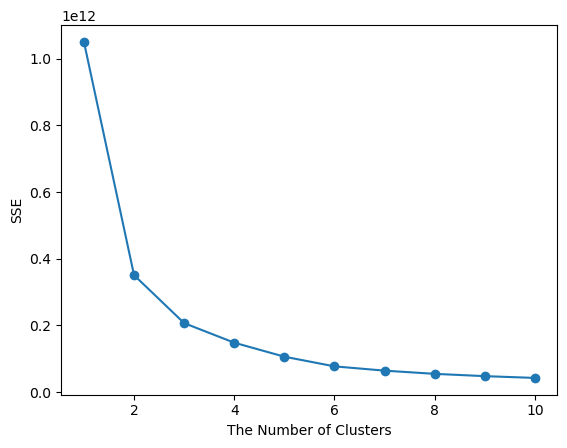

[1049913737792.9426, 350560530459.41235, 206763775488.3191, 148110104399.84717, 106148167088.99997, 77128685702.76328, 64286788886.43512, 54691019569.57747, 47797879128.82628, 42468526329.2354]


In [29]:
elbow(data_dum)

In [30]:
km = KMeans(n_clusters = 3, random_state = 1)
km.fit(data_dum)

KMeans(n_clusters=3, random_state=1)

In [31]:
new_labels = km.labels_
data['cluster'] = new_labels
data

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,cluster
0,5524,1957,Single,58138.0,0,0,635,88,546,172,88,3,8,10,4,7,2
1,2174,1954,Single,46344.0,1,1,11,1,6,2,1,2,1,1,2,5,2
2,4141,1965,Together,71613.0,0,0,426,49,127,111,21,1,8,2,10,4,0
3,6182,1984,Together,26646.0,1,0,11,4,20,10,3,2,2,0,4,6,1
4,5324,1981,Married,58293.0,1,0,173,43,118,46,27,5,5,3,6,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Married,61223.0,0,1,709,43,182,42,118,2,9,3,4,5,2
2236,4001,1946,Together,64014.0,2,1,406,0,30,0,0,7,8,2,5,7,2
2237,7270,1981,Divorced,56981.0,0,0,908,48,217,32,12,1,2,3,13,6,2
2238,8235,1956,Together,69245.0,0,1,428,30,214,80,30,2,6,5,10,3,0


In [34]:
data.cluster.value_counts()

2    812
1    741
0    687
Name: cluster, dtype: int64

In [37]:
group_mean = data.groupby('cluster').mean()
group_mean.reset_index(inplace = True)
group_mean

,cluster,ID,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,0,5770.388646,1967.429403,76967.652111,0.084425,0.350801,616.861718,57.052402,397.494905,82.835517,60.053857,1.605531,5.398836,5.457060,8.401747,3.155750
1,1,5662.222672,1973.105263,28348.147099,0.808367,0.311741,30.568151,5.990553,25.570850,9.068826,6.056680,2.141700,2.156545,0.529015,3.082321,6.908232
2,2,5377.431034,1966.046798,52385.061926,0.416256,0.815271,288.646552,18.821429,100.912562,25.158867,18.320197,3.100985,4.732759,2.243842,6.051724,5.692118


In [49]:
group_mean[['cluster','Year_Birth','Income','Kidhome','Teenhome']]
group_mean

,cluster,ID,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,0,5770.388646,1967.429403,76967.652111,0.084425,0.350801,616.861718,57.052402,397.494905,82.835517,60.053857,1.605531,5.398836,5.457060,8.401747,3.155750
1,1,5662.222672,1973.105263,28348.147099,0.808367,0.311741,30.568151,5.990553,25.570850,9.068826,6.056680,2.141700,2.156545,0.529015,3.082321,6.908232
2,2,5377.431034,1966.046798,52385.061926,0.416256,0.815271,288.646552,18.821429,100.912562,25.158867,18.320197,3.100985,4.732759,2.243842,6.051724,5.692118


In [50]:
Mnt_group = group_mean[['cluster','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts']]
Mnt_group

,cluster,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
0,0,616.861718,57.052402,397.494905,82.835517,60.053857
1,1,30.568151,5.990553,25.570850,9.068826,6.056680
2,2,288.646552,18.821429,100.912562,25.158867,18.320197


In [64]:
sum_group_Mnt = np.array(Mnt_group.sum(1))
sum_group_Mnt.reshape(3,1)

array([[1214.29839884],
       [  78.25506073],
       [ 453.85960591]])

In [61]:
Mnt_group/sum_group_Mnt.reshape(3,1)

,cluster,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
0,0.000000,0.507998,0.046984,0.327345,0.068217,0.049456
1,0.012779,0.390622,0.076552,0.326763,0.115888,0.077397
2,0.004407,0.635982,0.041470,0.222343,0.055433,0.040365


In [62]:
data.loc[data['ID'] == 10870]

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,cluster
2235,10870,1967,Married,61223.0,0,1,709,43,182,42,118,2,9,3,4,5,2
